In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data Sets/heart_disease.csv")

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,459.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,0.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,229.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,459.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,689.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,919.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [6]:
df.shape

(920, 15)

In [7]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [8]:
df.drop(columns=['dataset'],axis=1,inplace=True)

In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through each categorical column and print value counts
for column in categorical_columns:
    print(f"Value Counts for '{column}':")
    print(df[column].value_counts())
    print("-" * 30)

Value Counts for 'sex':
sex
Male      726
Female    194
Name: count, dtype: int64
------------------------------
Value Counts for 'cp':
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
------------------------------
Value Counts for 'fbs':
fbs
False    692
True     138
Name: count, dtype: int64
------------------------------
Value Counts for 'restecg':
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
------------------------------
Value Counts for 'exang':
exang
False    528
True     337
Name: count, dtype: int64
------------------------------
Value Counts for 'slope':
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
------------------------------
Value Counts for 'thal':
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64
------------------------------


## Handling Missing Values

In [10]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mode())

In [11]:
df['chol'].value_counts()

chol
0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

In [12]:
df['chol']=df['chol'].fillna(df['chol'].mean())

In [13]:
df.dropna(subset=['restecg'],inplace=True)

In [14]:
df['fbs']=df['fbs'].fillna('Missing')

In [15]:
df['thalch']=df['thalch'].fillna(df['thalch'].mean())

In [16]:
df['exang']=df['exang'].fillna('Missing')

In [17]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mode())

In [18]:
df['slope']=df['slope'].fillna('Missing')

In [19]:
df['ca']=df['ca'].fillna('0.0')

In [20]:
df['thal']=df['thal'].fillna('No')

In [21]:
df.head(20)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
5,5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal
6,6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal
7,7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal
8,8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect
9,9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect


In [22]:
df.isnull().sum()

id           0
age          0
sex          0
cp           0
trestbps    59
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
ca           0
thal         0
dtype: int64

In [23]:
df['oldpeak']=df['oldpeak'].fillna('0.0')

In [24]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())

In [26]:
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## Applying OneHot Encoding

In [27]:
# categorical_cols = df.select_dtypes(include='object').columns
# df = pd.get_dummies(df, columns=categorical_cols)

from sklearn.preprocessing import OneHotEncoder

# Columns to encode
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Encode and merge in one step
df = pd.get_dummies(df, columns=cols)

# df.head()

In [28]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,cp_asymptomatic,...,exang_True,exang_Missing,slope_Missing,slope_downsloping,slope_flat,slope_upsloping,thal_No,thal_fixed defect,thal_normal,thal_reversable defect
0,0,63,145.0,233.0,150.0,2.3,0.0,False,True,False,...,False,False,False,True,False,False,False,True,False,False
1,1,67,160.0,286.0,108.0,1.5,3.0,False,True,True,...,True,False,False,False,True,False,False,False,True,False
2,2,67,120.0,229.0,129.0,2.6,2.0,False,True,True,...,True,False,False,False,True,False,False,False,False,True
3,3,37,130.0,250.0,187.0,3.5,0.0,False,True,False,...,False,False,False,True,False,False,False,False,True,False
4,4,41,130.0,204.0,172.0,1.4,0.0,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [29]:
df.shape

(918, 30)

## Check and Handling the Outliers

In [30]:
numeric_feature=df.select_dtypes(include=["float64","int64"]).columns
print("Total number of integer feature : ", numeric_feature.shape[0])
print("Integer feature names: ", numeric_feature)

Total number of integer feature :  5
Integer feature names:  Index(['id', 'age', 'trestbps', 'chol', 'thalch'], dtype='object')


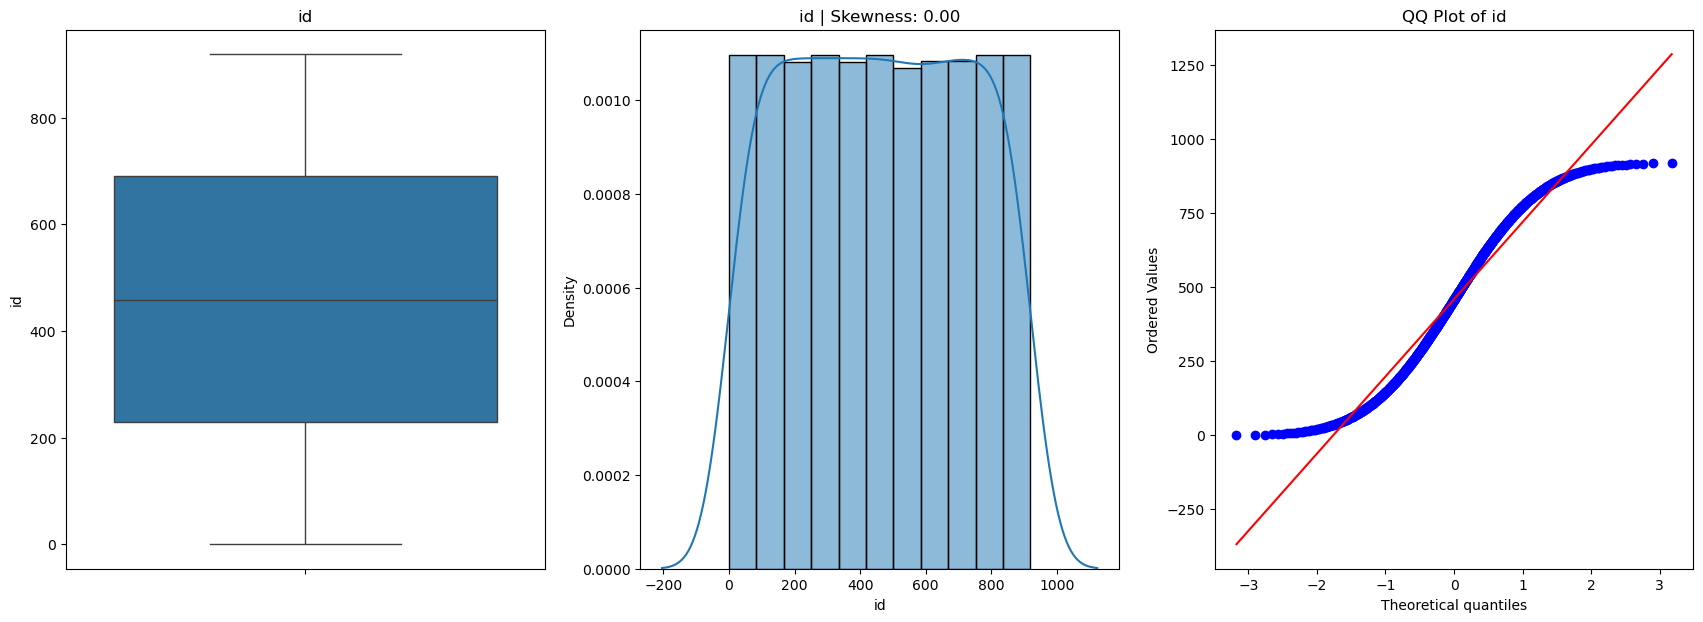

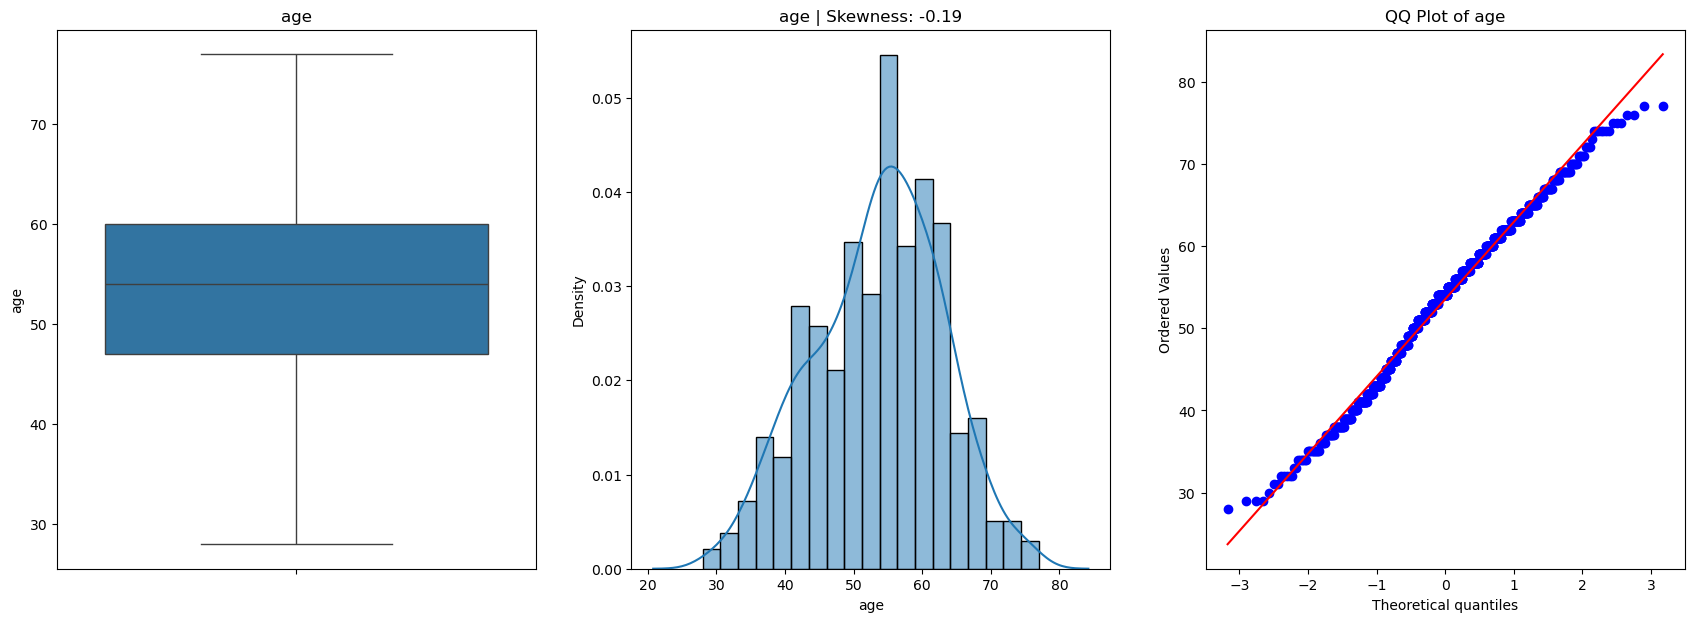

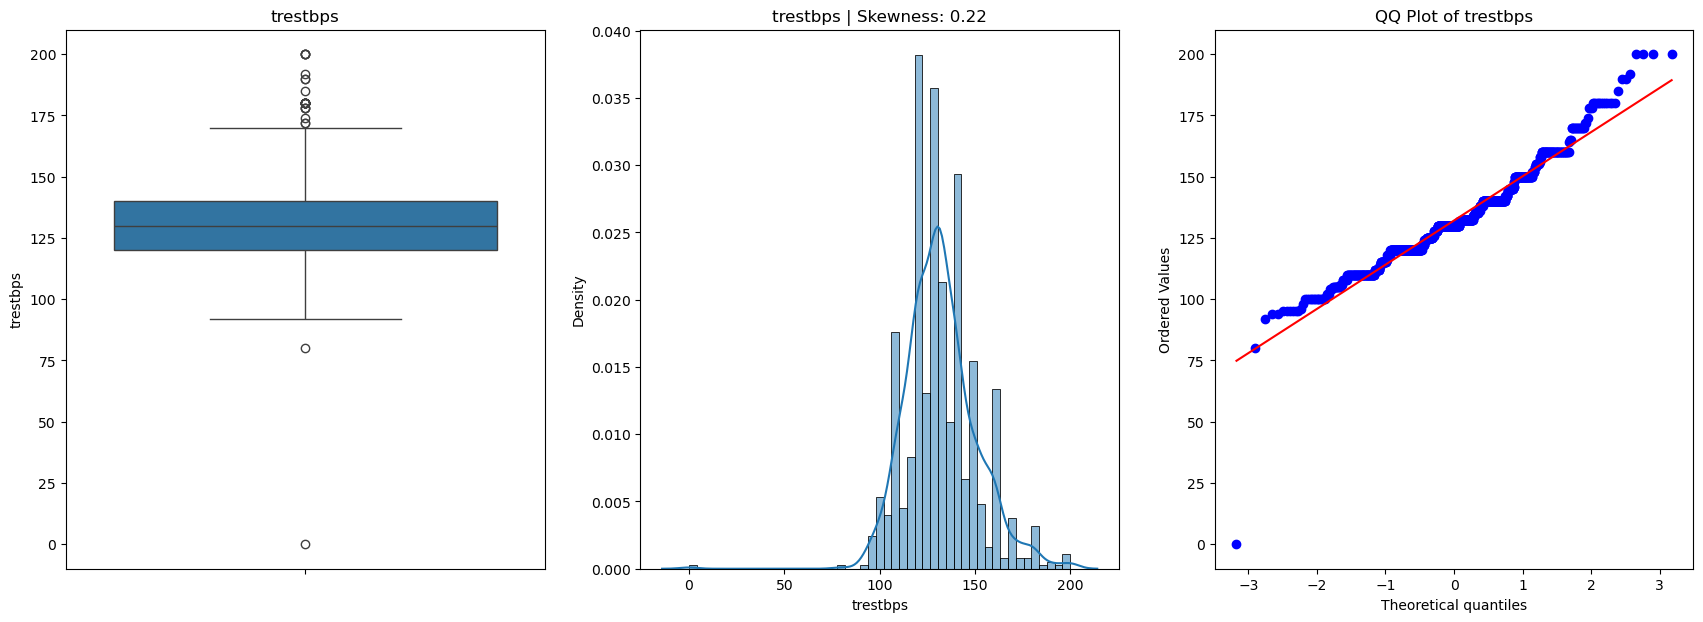

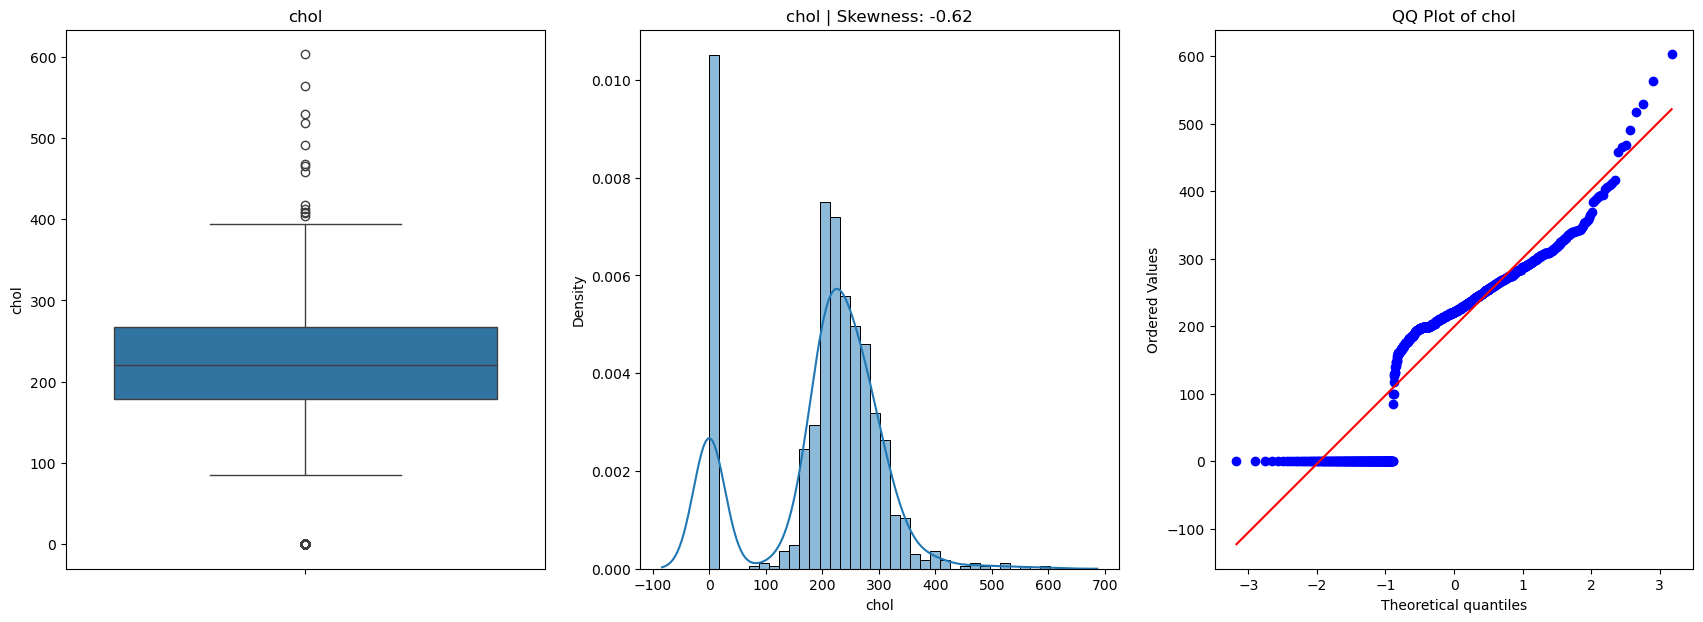

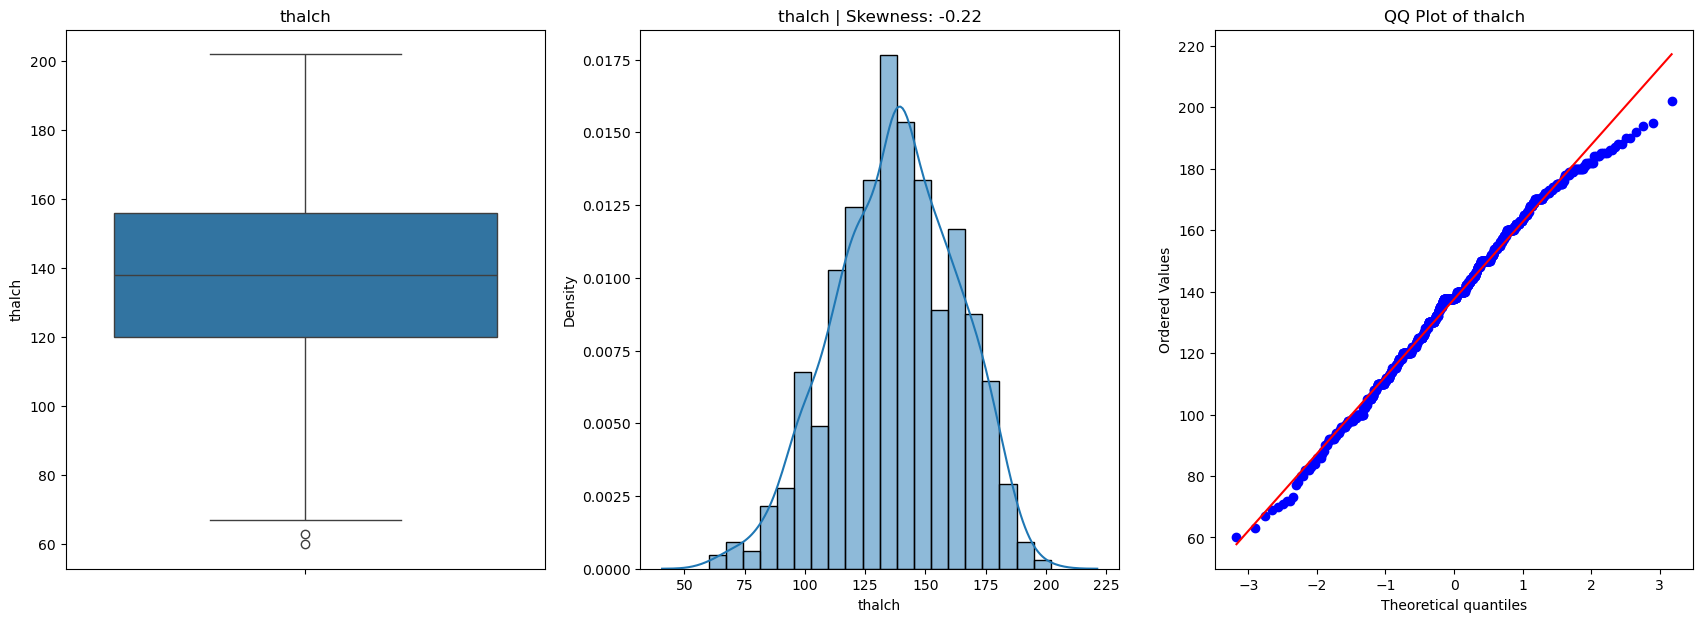

Columns with outliers: ['trestbps' 'chol' 'thalch']


In [31]:
from scipy import stats
outlier_cols = []

for col in numeric_feature:
    n = df[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(df[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

plt.show()

In [32]:
X_cap = df.copy()
for col in outlier_cols:
       percentile25 = df[col].quantile(0.25)
       percentile75 = df[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       #capping
       
 
       X_cap[col] = np.where(
         X_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  X_cap[col] < lower_limit,
                  lower_limit,
                  X_cap[col]
                  )
       )

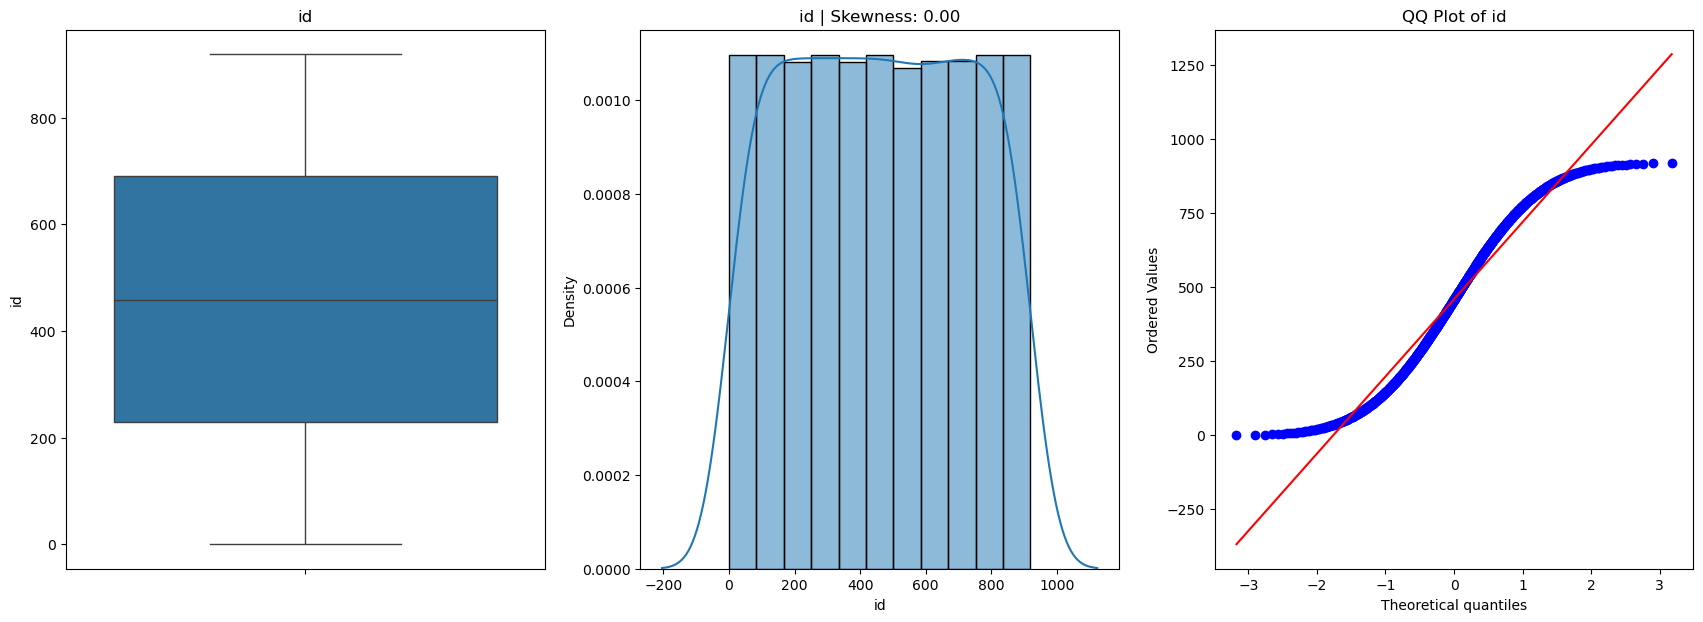

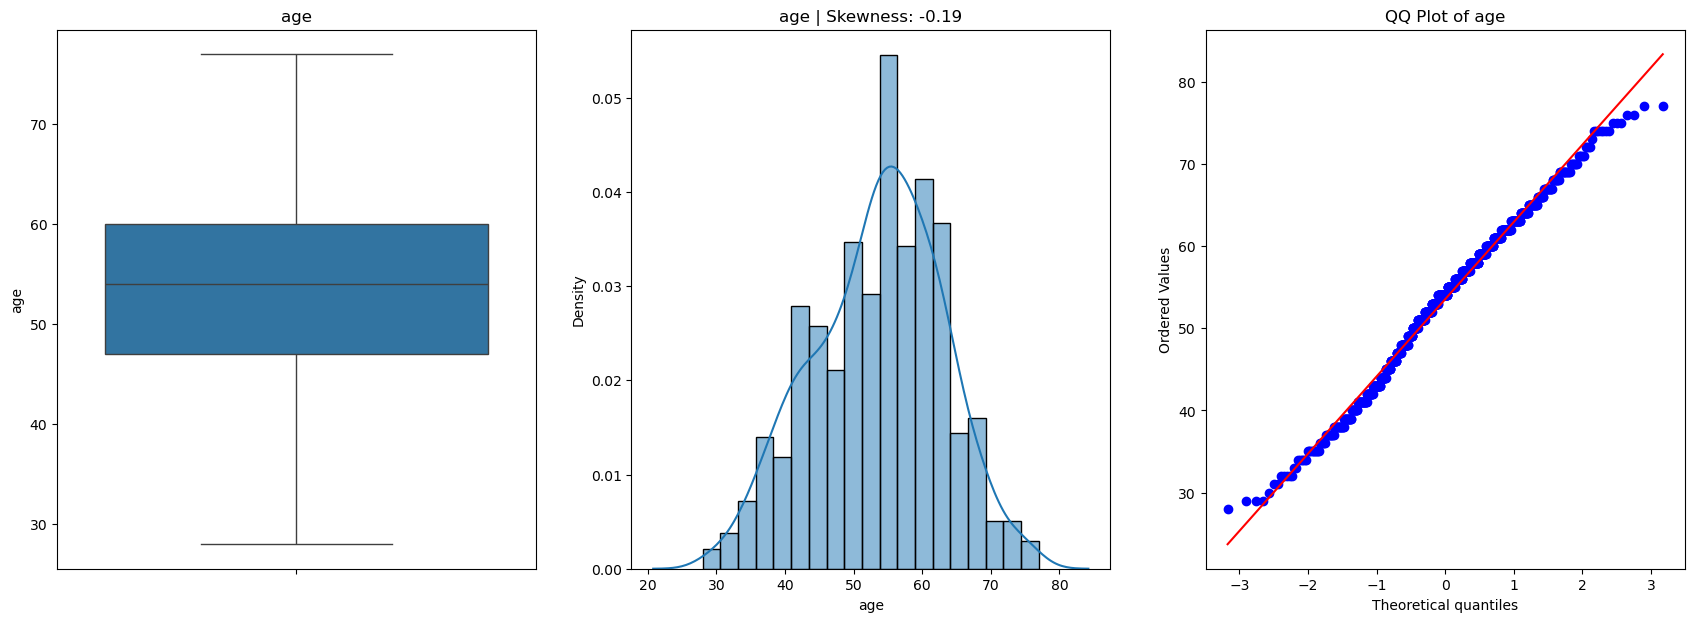

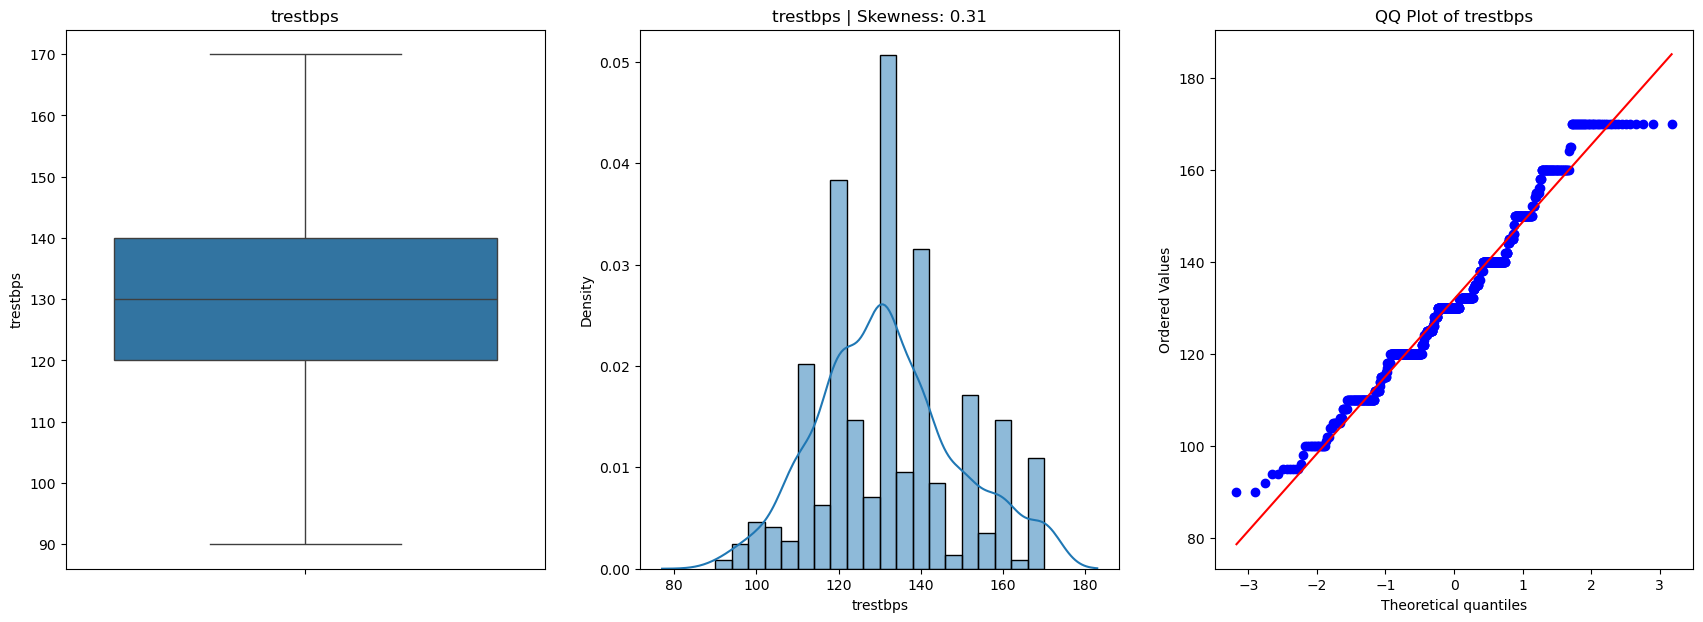

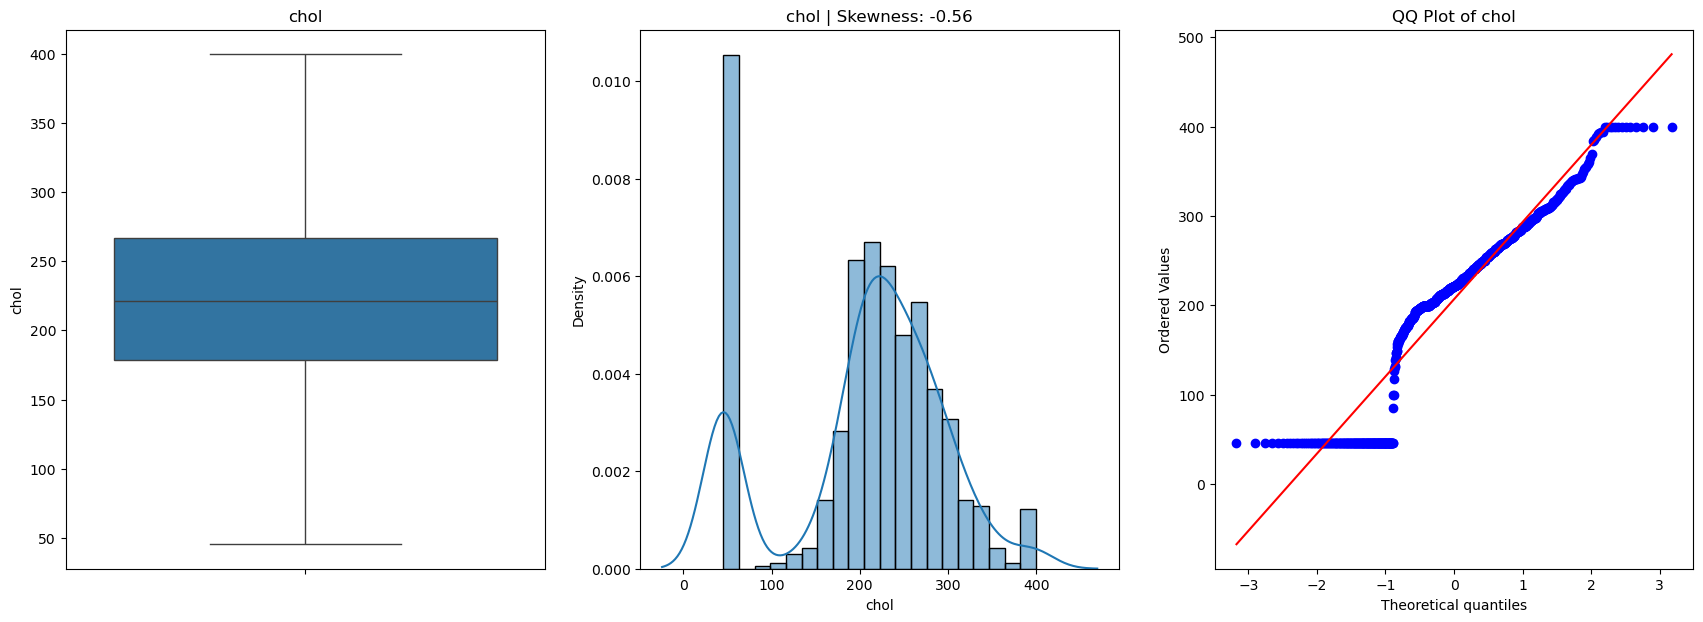

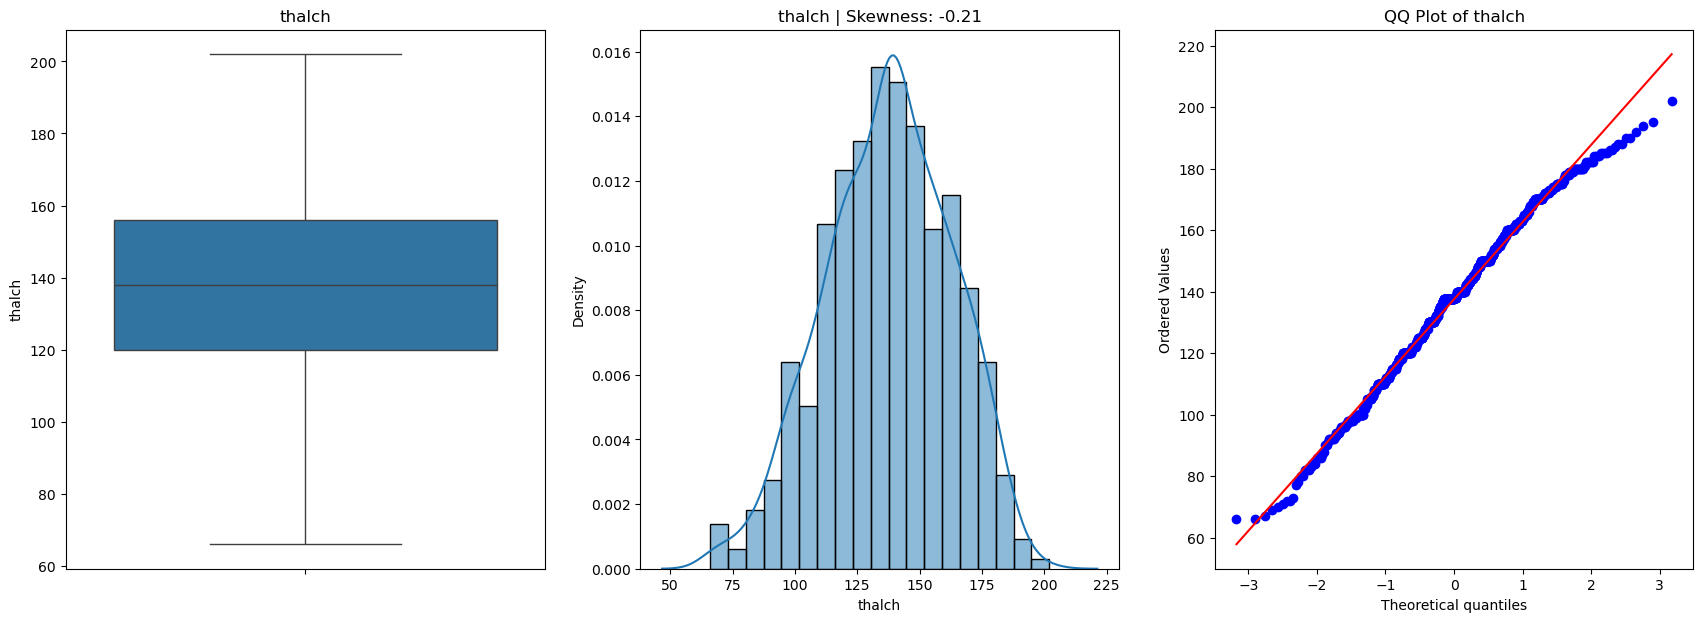

Columns with outliers: []


In [33]:
outlier_cols = []

for col in numeric_feature:
    n = X_cap[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(X_cap[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(X_cap[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(X_cap[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(X_cap[col], 25)
    q3 = np.percentile(X_cap[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (X_cap[col] < lower_bound) | (X_cap[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

   # print(f"Column: {col} | Skewness: {n}")

plt.show()

In [34]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# # Standardize the data
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

In [35]:
X = df.drop(columns=['id'])

In [36]:
X.isnull().sum()

age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
ca                          0
sex_Female                  0
sex_Male                    0
cp_asymptomatic             0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_False                   0
fbs_True                    0
fbs_Missing                 0
restecg_lv hypertrophy      0
restecg_normal              0
restecg_st-t abnormality    0
exang_False                 0
exang_True                  0
exang_Missing               0
slope_Missing               0
slope_downsloping           0
slope_flat                  0
slope_upsloping             0
thal_No                     0
thal_fixed defect           0
thal_normal                 0
thal_reversable defect      0
dtype: int64

## Applying K-Means

In [37]:
from sklearn.cluster import KMeans
# Apply K-Means Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


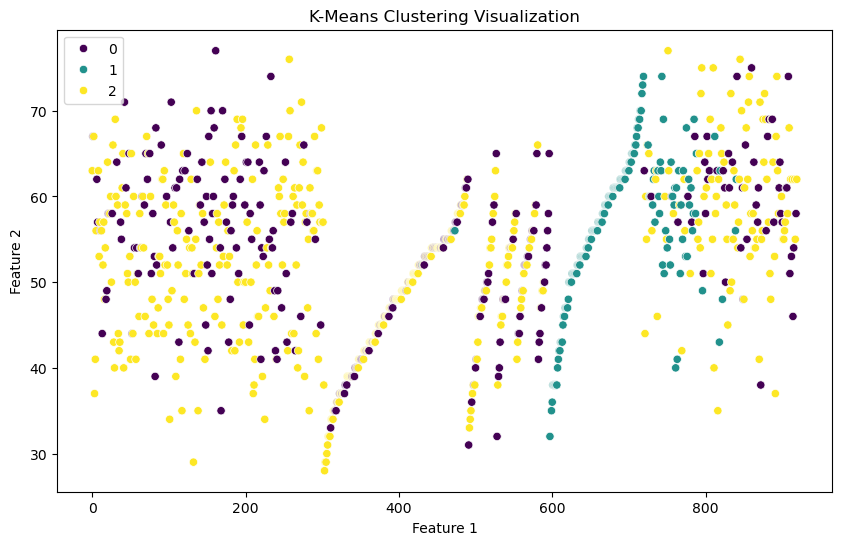

In [40]:
from sklearn.cluster import KMeans
# Visualize the clusters (using first two principal components for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()